In [1]:
import matplotlib.pyplot as plt
import cv2



In [ ]:
from unet.model import *
from unet.data import *
from unet.augmentation import *

In [ ]:
! git clone https://github.com/Nelson-Gon/unet.git && cd unet/data/membrane

/content/unet/data/membrane


In [ ]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
data_gen_args = dict(rotation_range=45,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
! ls train

aug  image  label


In [ ]:
%cd train

/content/unet/data/membrane/train


In [ ]:
imgs_train,imgs_mask_train = geneTrainNpy("aug","aug")

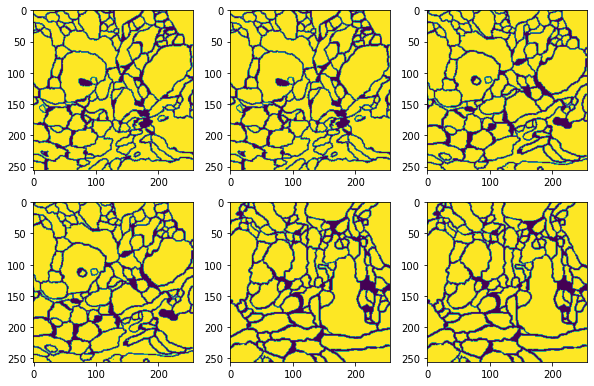

In [ ]:
show_augmented(number = 6, image_type="masks")

In [ ]:
model = unet(loss=[dice_coef_loss], metrics=[dice_coef], learning_rate=1e-4)
model_checkpoint = ModelCheckpoint('"model_file_here.h5', monitor='loss',verbose=1, save_best_only=True)

In [ ]:
model.fit(imgs_train, imgs_mask_train, batch_size=2, epochs=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

In [ ]:
test_generator = testGenerator("../test", 30, image_suffix="png")



In [ ]:
model = unet()
model.load_weights("model_file_here.h5")
results = model.predict_generator(test_generator,30,verbose=1)

30/30 [==============================] - 1s 46ms/step


In [ ]:
plt.imshow(results[20][:,:,0])